There are a couple of functions that'll make your life easier when dealing with window functions and pivoting. 


Recall this query from the ROLLUP and CUBE. Also recall that the nulls in the output signify group totals.

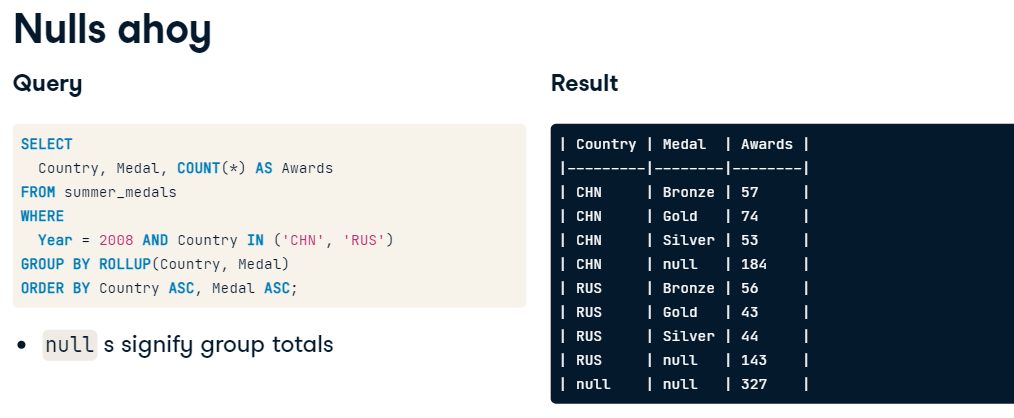

What if you want to replace the nulls with something that actually indicates that these rows are group totals?

Enter COALESCE. COALESCE takes a list of values and returns the first non-null value, going from left to right.

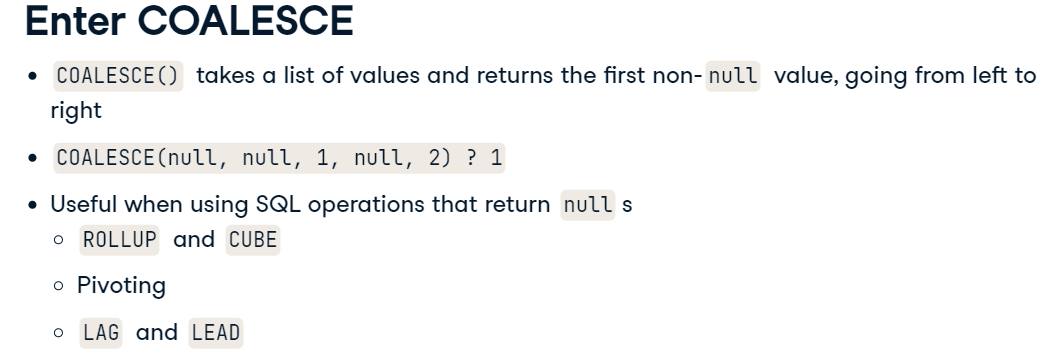

COALESCE is useful when using SQL operations that return nulls, such as ROLLUP and CUBE. Other operations that return nulls are pivoting (when some of your rows don't have any corresponding values for the new columns) and positional operations like LAG, which always returns a null for the first row, because it has no previous row.

The only change to the previous query you need to make is to wrap the two columns with the COALESCE function, and pass it the string you want the column to contain if its value is null. The Country column is null when it's the grand total, so the string should be Both countries, whereas the Medal column is null when it's the count of all medals, so it should be All medals. 

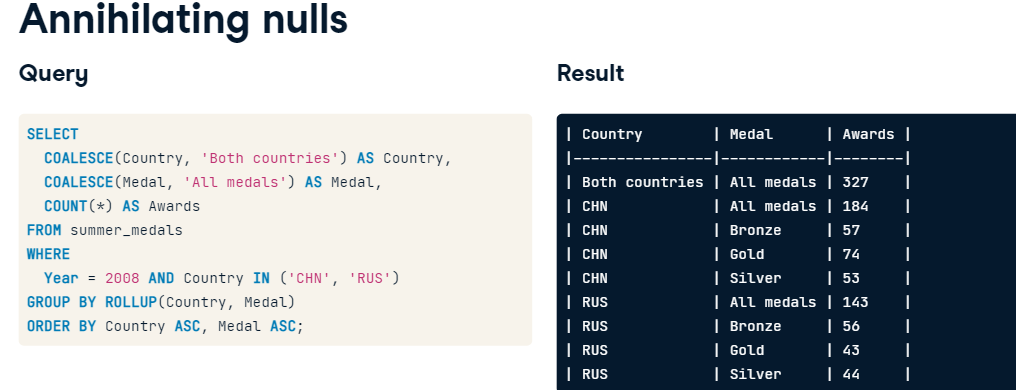

Make sure to name the output columns as the columns you passed as their first argument for consistent results. As you can see in the output, the nulls have been replaced by what was passed in each COALESCE.

Let's move on to another common issue. In the before table, you have the rankings of these three countries in the 2012 Olympics by their count of gold medals in Gymnastics events. Notice that when you sort by Rank, Rank becomes redundant, since the sort order implies Rank -- the first rank is the first row; the second rank is the second row, and so on. 

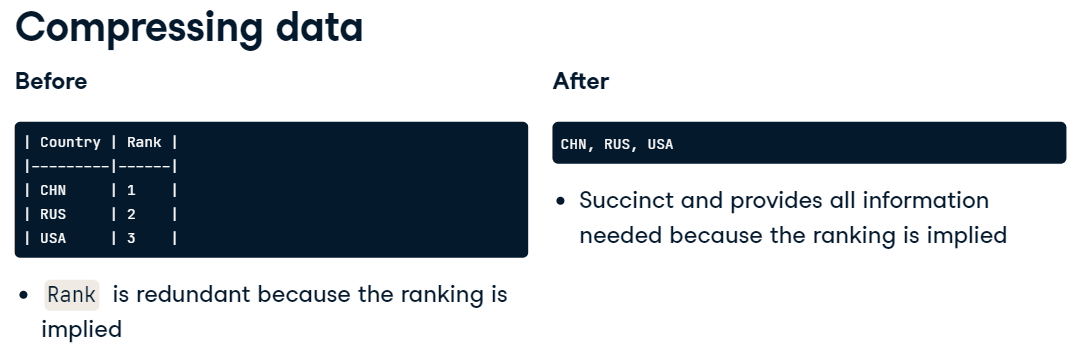

Instead of returning three rows and two columns, you could return one row with a list of each country; the first country is the leftmost one, and so on. How can you compress data like that in SQL?

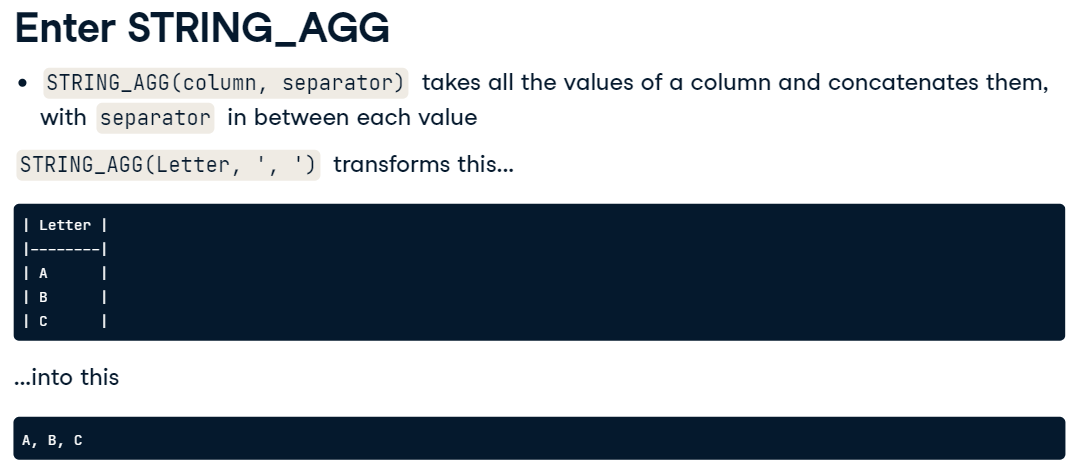

Enter STRING_AGG. STRING_AGG takes all the values of a column and concatenates them, with a separator in between each value. It transforms this... into this. STRING_AGG is useful when you need to reduce the number of rows returned.

The before query returns the before table from two slides ago. It should be pretty familiar by now. To use STRING_AGG, simply wrap the final query of the before query in a CTE called Country_Ranks. Then, use STRING_AGG on the Country column, and pass it a separator of a comma with a space after it. You'll get the clean result that you see below.

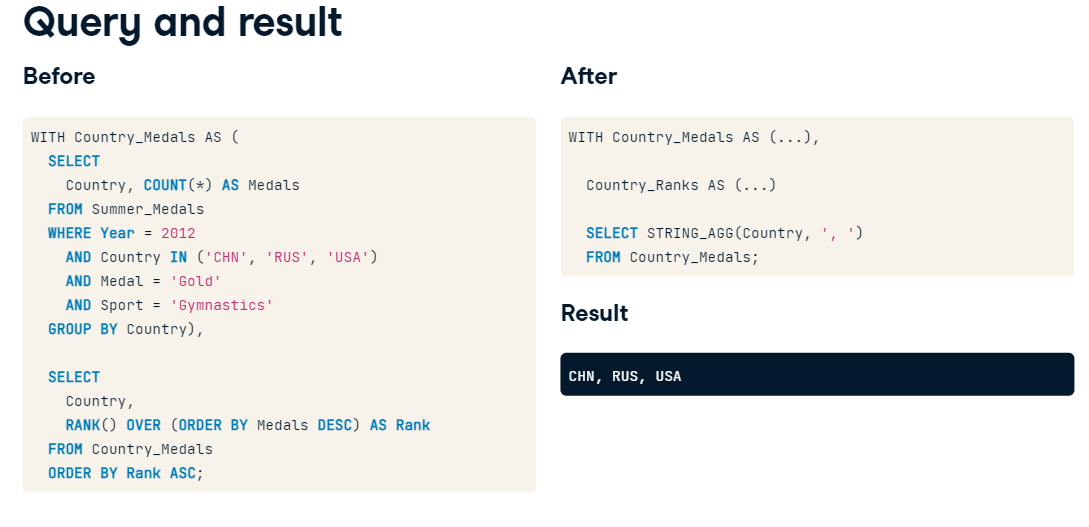

Using COALESCE and STRING_AGG, you can clean and compress your queries' results. Let's practice using these two functions in the following exercises.


#### Cleaning up results
Returning to the breakdown of Scandinavian awards you previously made, you want to clean up the results by replacing the nulls with meaningful text.


- Turn the nulls in the Country column to All countries, and the nulls in the Gender column to All genders.


```sql
SELECT
  -- Replace the nulls in the columns with meaningful text
  COALESCE(Country, 'All countries') AS Country,
  COALESCE(Gender, 'All genders') AS Gender,
  COUNT(*) AS Awards
FROM Summer_Medals
WHERE
  Year = 2004
  AND Medal = 'Gold'
  AND Country IN ('DEN', 'NOR', 'SWE')
GROUP BY ROLLUP(Country, Gender)
ORDER BY Country ASC, Gender ASC;
```

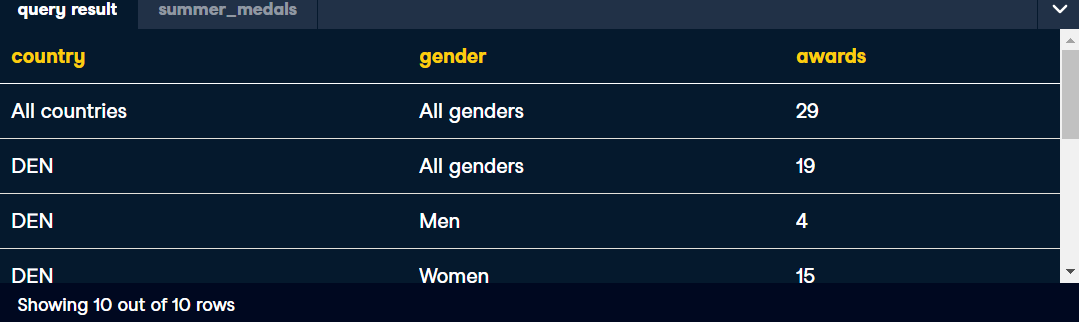

#### Summarizing results
After ranking each country in the 2000 Olympics by gold medals awarded, you want to return the top 3 countries in one row, as a comma-separated string. In other words, turn this:


| Country | Rank |
|---------|------|
| USA     | 1    |
| RUS     | 2    |
| AUS     | 3    |
| ...     | ...  |


into this:

USA, RUS, AUS

- Rank countries by the medals they've been awarded.


```sql
WITH Country_Medals AS (
  SELECT
    Country,
    COUNT(*) AS Medals
  FROM Summer_Medals
  WHERE Year = 2000
    AND Medal = 'Gold'
  GROUP BY Country)

  SELECT
    Country,
    -- Rank countries by the medals awarded
    RANK() OVER (ORDER BY Medals DESC) AS Rank
  FROM Country_Medals
  ORDER BY Rank ASC;
  ```
  
  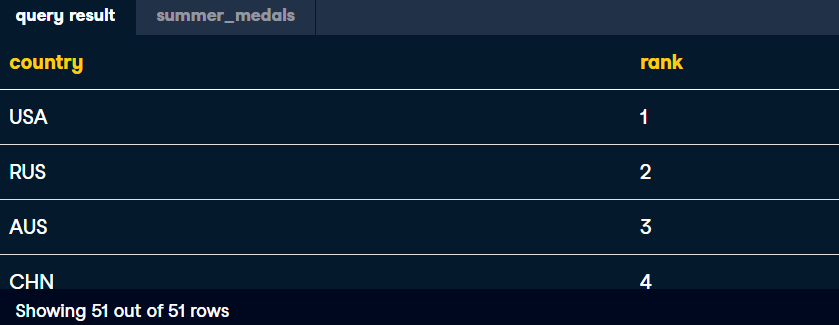
  
  - Return the top 3 countries by medals awarded as one comma-separated string.
  
  
  ```sql
  WITH Country_Medals AS (
  SELECT
    Country,
    COUNT(*) AS Medals
  FROM Summer_Medals
  WHERE Year = 2000
    AND Medal = 'Gold'
  GROUP BY Country),

  Country_Ranks AS (
  SELECT
    Country,
    RANK() OVER (ORDER BY Medals DESC) AS Rank
  FROM Country_Medals
  ORDER BY Rank ASC)

-- Compress the countries column
SELECT STRING_AGG(Country, ', ')
FROM Country_Ranks
-- Select only the top three ranks
WHERE Rank <= 3;
```


